In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
BTC = yf.download('BTC-USD', start='2022-12-24', end='2022-12-25',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [3]:
BTC

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-24 00:00:00+00:00,16796.976562,16796.976562,16796.976562,16796.976562,16796.976562,0
2022-12-24 00:01:00+00:00,16797.513672,16797.513672,16797.513672,16797.513672,16797.513672,0
2022-12-24 00:02:00+00:00,16797.535156,16797.535156,16797.535156,16797.535156,16797.535156,0
2022-12-24 00:03:00+00:00,16797.552734,16797.552734,16797.552734,16797.552734,16797.552734,0
2022-12-24 00:04:00+00:00,16794.287109,16794.287109,16794.287109,16794.287109,16794.287109,0
...,...,...,...,...,...,...
2022-12-24 23:55:00+00:00,16848.976562,16848.976562,16848.976562,16848.976562,16848.976562,4188160
2022-12-24 23:56:00+00:00,16848.990234,16848.990234,16848.990234,16848.990234,16848.990234,0
2022-12-24 23:57:00+00:00,16849.703125,16849.703125,16849.703125,16849.703125,16849.703125,36864


In [4]:
ETH = yf.download('ETH-USD', start='2022-12-24', end='2022-12-25',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [5]:
ETH

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-24 00:00:00+00:00,1220.117920,1220.117920,1220.117920,1220.117920,1220.117920,0
2022-12-24 00:01:00+00:00,1220.205444,1220.205444,1220.205444,1220.205444,1220.205444,0
2022-12-24 00:02:00+00:00,1220.328491,1220.328491,1220.328491,1220.328491,1220.328491,0
2022-12-24 00:03:00+00:00,1220.246460,1220.246460,1220.246460,1220.246460,1220.246460,0
2022-12-24 00:04:00+00:00,1220.199341,1220.199341,1220.199341,1220.199341,1220.199341,0
...,...,...,...,...,...,...
2022-12-24 23:55:00+00:00,1221.322266,1221.322266,1221.322266,1221.322266,1221.322266,0
2022-12-24 23:56:00+00:00,1221.301636,1221.301636,1221.301636,1221.301636,1221.301636,0
2022-12-24 23:57:00+00:00,1221.290649,1221.290649,1221.290649,1221.290649,1221.290649,2304


In [6]:
S1_0 = BTC['Open'][0]
S2_0 = ETH['Open'][0]

In [7]:
S1_0

16796.9765625

In [8]:
S2_0

1220.117919921875

In [9]:
lr1 = np.log(BTC['Adj Close'] / BTC['Adj Close'].shift(1))
lr2 = np.log(ETH['Adj Close'] / ETH['Adj Close'].shift(1))
mu_1 = lr1.mean() * 390
mu_2 = lr2.mean() * 390
sigma_1 = lr1.std() * np.sqrt(390)
sigma_2 = lr2.std() * np.sqrt(390)
rho = lr1.corr(lr2) #Correlation between logarithm
z_0 = 0.0001
gamma = 0.5 # Risk Averse parameter
delta = 0.8
T = 1
M = len(BTC)

In [10]:
rho

0.36907806730617343

In [11]:
result = linregress(np.log(BTC['Adj Close']), np.log(ETH['Adj Close']))
beta = result.slope

In [12]:
result

LinregressResult(slope=1.0535595712563626, intercept=-3.1464072543421704, rvalue=0.5129836524924364, pvalue=8.342214766743525e-97, stderr=0.04665308368713383, intercept_stderr=0.45400717298408355)

In [13]:
beta

1.0535595712563626

In [14]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [15]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = BTC['Adj Close'][t-1]
    S2[t] = ETH['Adj Close'][t-1]

Text(0.5, 1.0, 'Stock Price')

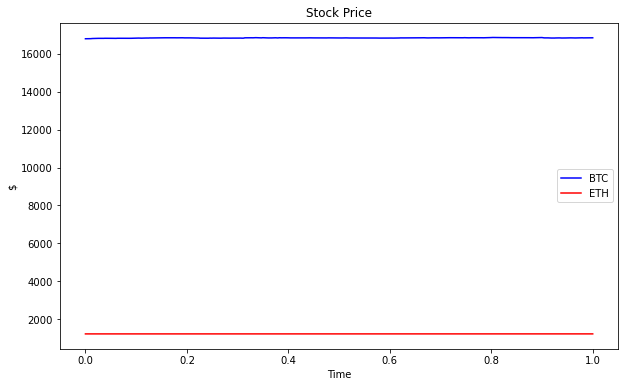

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='BTC')
plt.plot(tt, S2, 'r', lw=1.5, label='ETH')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')

Text(0.5, 1.0, 'z')

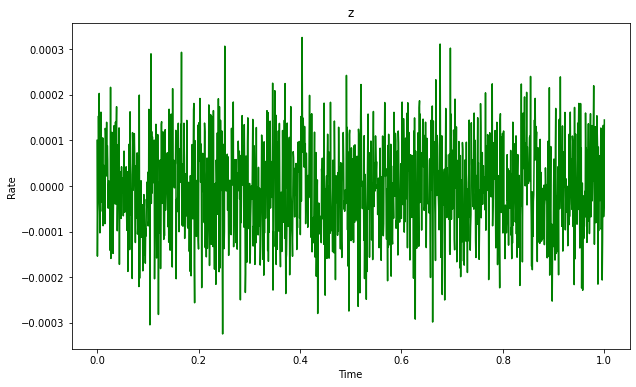

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [18]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

Text(0.5, 1.0, 'Weights')

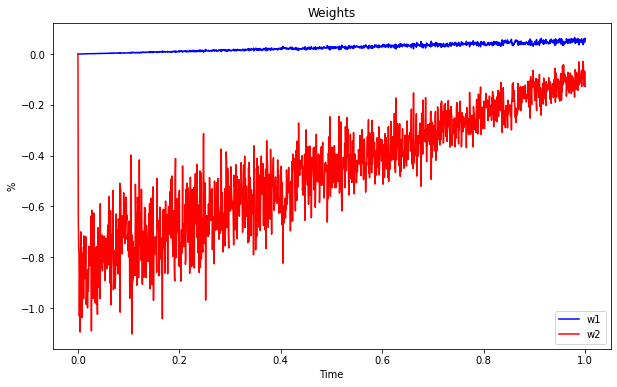

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Cash')

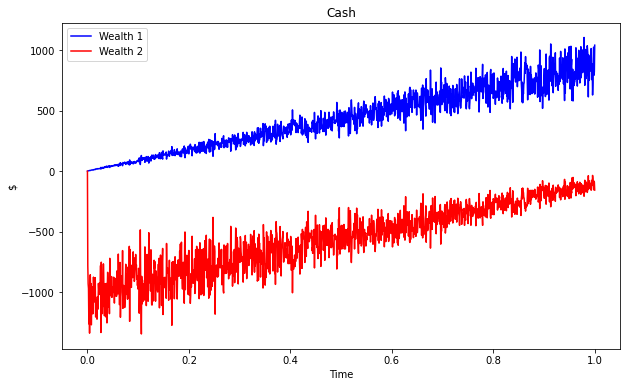

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Wealth 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

In [21]:
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

In [22]:
Pi_1[1]

array([0.00011736])

Text(0.5, 1.0, 'Wealth')

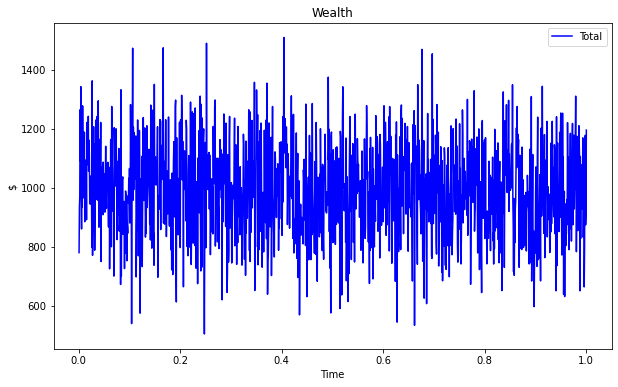

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Wealth[1:], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [24]:
Wealth[1] #today's value

array([779.47907877])

In [25]:
Wealth[-1] #Yesterday's value

array([1194.73048705])

In [26]:
(Wealth[-1] - Wealth[1])/Wealth[1] # Daily Return is 11% 

array([0.53272938])

In [27]:
Pi_1.mean()

0.025697881839503334

In [28]:
Pi_2.mean()

-0.45573180722009743

Text(0.5, 1.0, 'Comparison')

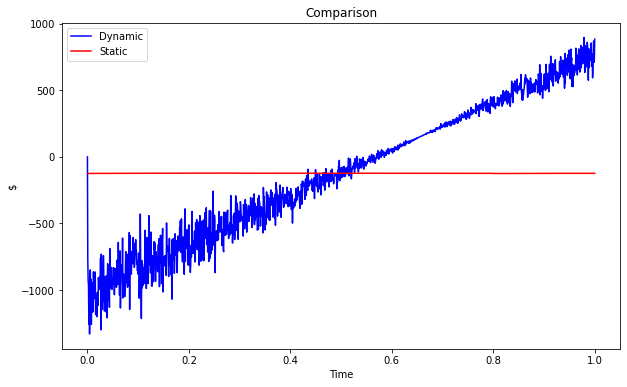

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')

# Changing Delta =1 to estimate rho

In [30]:
lr1 = np.log(BTC['Adj Close'] / BTC['Adj Close'].shift(1))
lr2 = np.log(ETH['Adj Close'] / ETH['Adj Close'].shift(1))
mu_1 = lr1.mean() * 390
mu_2 = lr2.mean() * 390
sigma_1 = lr1.std() * np.sqrt(390)
sigma_2 = lr2.std() * np.sqrt(390)
rho = lr1.corr(lr2) #Correlation between logarithm
z_0 = 0.0001
gamma = 0.5 # Risk Averse parameter
delta = 11
T = 1
M = len(BTC)

In [31]:
rho 

0.36907806730617343

# Beta Calculation 

In [32]:
BTC = yf.download('BTC-USD', start='2022-12-23', end='2022-12-24',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [33]:
ETH = yf.download('ETH-USD', start='2022-12-23', end='2022-12-24',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [34]:
lr1 = np.log(BTC['Adj Close'] / BTC['Adj Close'].shift(1))
lr2 = np.log(ETH['Adj Close'] / ETH['Adj Close'].shift(1))
mu_1 = lr1.mean() * 390
mu_2 = lr2.mean() * 390
sigma_1 = lr1.std() * np.sqrt(390)
sigma_2 = lr2.std() * np.sqrt(390)
rho = lr1.corr(lr2) #Correlation between logarithm
z_0 = 0.0001
gamma = 0.5 # Risk Averse parameter
delta = 1
T = 1
M = len(BTC)

In [35]:
result = linregress(np.log(BTC['Adj Close']), np.log(ETH['Adj Close']))
beta = result.slope

In [36]:
beta

1.0554163977000377

# Simulation of BTC & ETH with estimated parameters

In [37]:
S1_0 = 16796.9765625
S2_0 = 1220.117919921875
mu_1 = 0.02
mu_2 = 0.04
sigma_1 = 0.07
sigma_2 = 0.15
rho = -0.5
z_0 = 0.001
beta = 1.10
gamma = 1
delta = 0.5
T = 1
M = 390

In [38]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [39]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = S1[t-1] * np.exp((mu_1 + delta * z[t] - sigma_1 ** 2 / 2) * dt + sigma_1 * np.sqrt(dt) * rn1[t])
    S2[t] = S2[t-1] * np.exp((mu_2 - sigma_2 ** 2 / 2) * dt + sigma_2 * np.sqrt(dt) * (rho * rn1[t] + np.sqrt(1 - rho ** 2) * rn2[t]))

Text(0.5, 1.0, 'Stock Price')

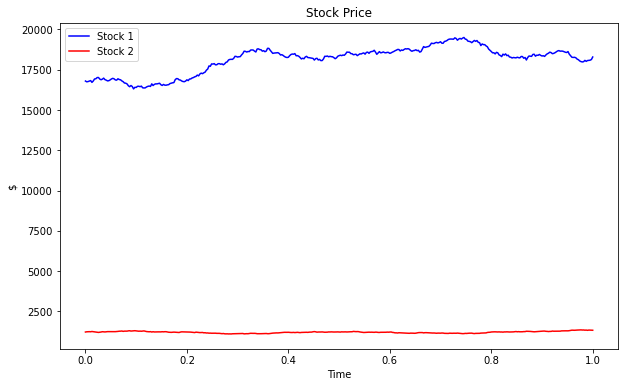

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='Stock 1')
plt.plot(tt, S2, 'r', lw=1.5, label='Stock 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')

Text(0.5, 1.0, 'z')

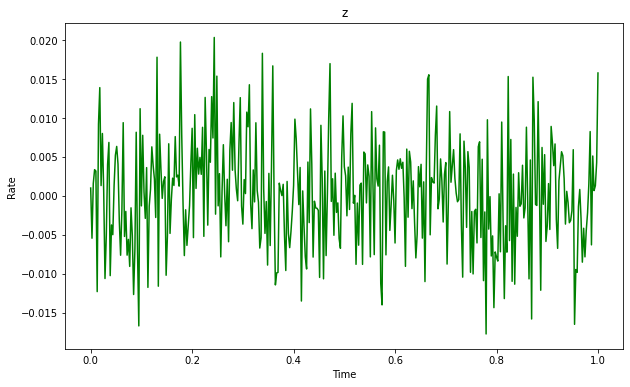

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [42]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

Text(0.5, 1.0, 'Weights')

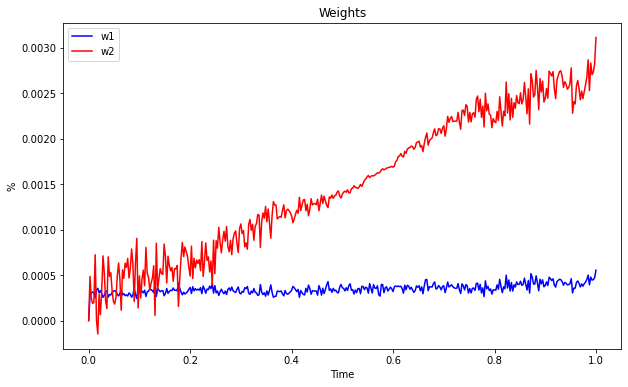

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Cash')

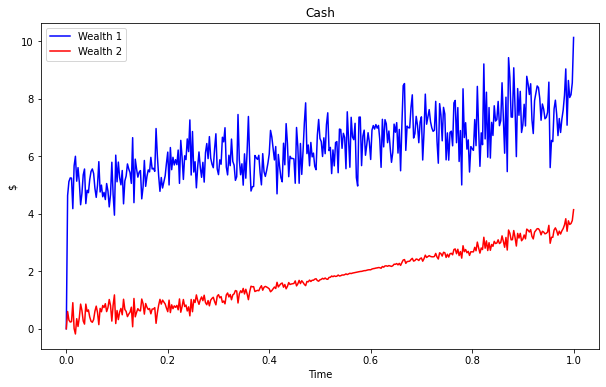

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Wealth 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

In [45]:
Pi_1.mean()

0.00034871577741641855

In [46]:
Pi_2.mean()

0.0014873556920739354

Text(0.5, 1.0, 'Comparison')

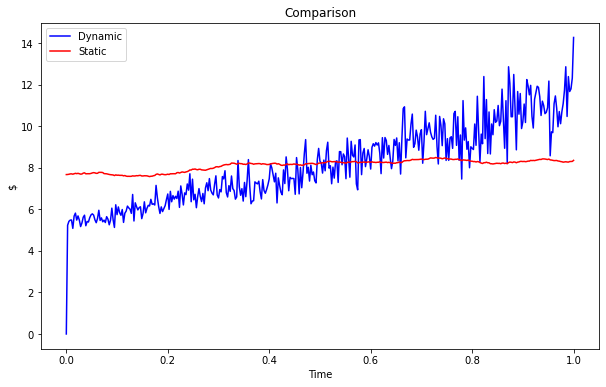

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')

In [48]:
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

Text(0.5, 1.0, 'Wealth')

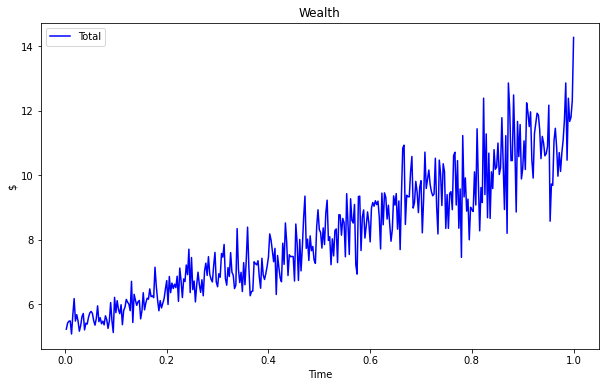

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Wealth[1:], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [50]:
Wealth[1]

array([5.23167372])

In [51]:
Wealth[-1]

array([14.27100951])

In [52]:
(Wealth[-1] - Wealth[1])/Wealth[1]

array([1.72780955])